In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# for data manipulation
import pandas as pd, numpy as np, random

#for graphs
import matplotlib.pyplot as plt
import seaborn as sns

#models to run
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import tree

#train_test_split
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV

#for cycle
from itertools import cycle

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, r2_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

RANDOM_STATE = 42
random.seed(RANDOM_STATE)

import math
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

from models.train_model_regression import LR_reg, KNN_reg, RandomForest_reg, SVM_reg
from models.train_model_classification import logit_class, KNN_class, RandomForest_class,SVM_class
from visualization.visualize import viz

In [17]:
auction = pd.read_csv('../data/processed/cleaned_auction_reg.csv')
X = auction.drop(['price'], axis = 1)
y = auction['price']

In [18]:

fit_lr = LR_reg(X,y, test_size=0.2, random_state=42)
fit_lr.fit(tune_fit = "no")
pred_lr = fit_lr.predict()

fit_knn = KNN_reg(X, y, n_neighbors=5, test_size=0.2, random_state=42)
fit_knn.fit(tune_fit = "no")
pred_knn = fit_knn.predict()

fit_rf = RandomForest_reg(X, y, random_state=42)
fit_rf.fit(tune_fit = "no")
pred_rf = fit_rf.predict()

fit_svm = SVM_reg(X, y, random_state=42)
fit_svm.fit(tune_fit = "no")
pred_svm = fit_svm.predict()

for i in range(3):
    if(i == 0):
        print("R^2 Scores: ")
        print("")
    if(i == 1):
        print("Mean Absolute Error: ")
        print("")
    if(i == 2):
        print("Mean Squared Error: ")
        print("")
    print("Linear Regression:", fit_lr.score()[i])
    print("KNN Regressor:", fit_knn.score()[i])
    print("RF Regressor:", fit_rf.score()[i])
    print("Linear SVM Regressor:", fit_svm.score()[i])
    print("")

R^2 Scores: 

Linear Regression: 0.8245225891994606
KNN Regressor: 0.88721080187006
RF Regressor: 0.8977720437537272
Linear SVM Regressor: 0.7925729278164269

Mean Absolute Error: 

Linear Regression: 0.24167873071048324
KNN Regressor: 0.14437825409047864
RF Regressor: 0.12223984631118713
Linear SVM Regressor: 0.20285637913939605

Mean Squared Error: 

Linear Regression: 0.16003825555191115
KNN Regressor: 0.10286558498593378
RF Regressor: 0.09323356044321297
Linear SVM Regressor: 0.1891768668973168



In [19]:
#for tuned models

fit_lr = LR_reg(X,y, test_size=0.2, random_state=42)
fit_lr.fit(tune_fit = "no")
pred_lr = fit_lr.predict()

fit_knn = KNN_reg(X, y, n_neighbors=5, test_size=0.2, random_state=42)
fit_knn.fit(tune_fit = "yes")
pred_knn = fit_knn.predict()

#tuning takes too long on these.

fit_rf = RandomForest_reg(X, y, random_state=42)
fit_rf.fit(tune_fit = "yes")
pred_rf = fit_rf.predict()

fit_svm = SVM_reg(X, y, random_state=42)
fit_svm.fit(tune_fit = "yes")
pred_svm = fit_svm.predict()

for i in range(3):
    if(i == 0):
        print("R^2 Scores: ")
        print("")
    if(i == 1):
        print("Mean Absolute Error: ")
        print("")
    if(i == 2):
        print("Mean Squared Error: ")
        print("")
    print("Linear Regression:", fit_lr.score()[i])
    print("KNN Regressor:", fit_knn.score()[i])
    print("RF Regressor:", fit_rf.score()[i])
    print("Linear SVM Regressor:", fit_svm.score()[i])
    print("")

R^2 Scores: 

Linear Regression: 0.8245225891994606
KNN Regressor: 0.8652828207005111
RF Regressor: 0.8970867242201719
Linear SVM Regressor: 0.7925729278164269

Mean Absolute Error: 

Linear Regression: 0.24167873071048324
KNN Regressor: 0.17033963347805844
RF Regressor: 0.12093885554718896
Linear SVM Regressor: 0.20285637913939605

Mean Squared Error: 

Linear Regression: 0.16003825555191115
KNN Regressor: 0.1228642608162872
RF Regressor: 0.0938585830153235
Linear SVM Regressor: 0.1891768668973168



In [20]:
#==================================================#
#===================Test Classification============#

import os
cwd = os.getcwd()
print(cwd)
auction = pd.read_csv('../data/processed/cleaned_auction_class.csv')
X = auction.drop(['item'], axis = 1)
y = auction['item']


fit_logit = logit_class(X,y, test_size=0.2, random_state=42)
fit_logit.fit(tune_fit = "no")
pred_logit = fit_logit.predict()

fit_knn_class = KNN_class(X, y, n_neighbors=5, test_size=0.2, random_state=42)
fit_knn_class.fit(tune_fit = "no")
pred_knn_class = fit_knn_class.predict()

fit_rf_class = RandomForest_class(X, y, random_state=42)
fit_rf_class.fit(tune_fit = "no")
pred_rf_class = fit_rf_class.predict()

fit_svm_class = SVM_class(X, y, random_state=42)
fit_svm_class.fit(tune_fit = "no")
pred_svm_class= fit_svm_class.predict()

for i in range(2):
    if(i == 0):
        print("Accuracy: ")
        print("")
    if(i == 1):
        print("Classification report: ")
        print("")
    print("Logistic Regression:", fit_logit.score()[i])
    print("KNN Classifier:", fit_knn_class.score()[i])
    print("RF Classifier:", fit_rf_class.score()[i])
    print("SVM Classifier:", fit_svm_class.score()[i])
    print("")

c:\Users\Stefan\Downloads\final-project-190563930\src
Accuracy: 

Logistic Regression: 0.9221871713985279
KNN Classifier: 0.9348054679284963
RF Classifier: 0.9968454258675079
SVM Classifier: 0.9316508937960042

Classification report: 

Logistic Regression:                     precision    recall  f1-score   support

Cartier wristwatch       0.95      0.86      0.90       401
 Xbox game console       0.91      0.97      0.93       550

          accuracy                           0.92       951
         macro avg       0.93      0.91      0.92       951
      weighted avg       0.92      0.92      0.92       951

KNN Classifier:                     precision    recall  f1-score   support

Cartier wristwatch       0.95      0.89      0.92       401
 Xbox game console       0.92      0.97      0.94       550

          accuracy                           0.93       951
         macro avg       0.94      0.93      0.93       951
      weighted avg       0.94      0.93      0.93       951

R

In [21]:
#==================================================#
#===================Test Classification============#

import os
cwd = os.getcwd()
print(cwd)
auction = pd.read_csv('../data/processed/cleaned_auction_class.csv')
X = auction.drop(['item'], axis = 1)
y = auction['item']


fit_logit = logit_class(X,y, test_size=0.2, random_state=42)
fit_logit.fit(tune_fit = "yes")
pred_logit = fit_logit.predict()

fit_knn_class = KNN_class(X, y, n_neighbors=5, test_size=0.2, random_state=42)
fit_knn_class.fit(tune_fit = "yes")
pred_knn_class = fit_knn_class.predict()

fit_rf_class = RandomForest_class(X, y, random_state=42)
fit_rf_class.fit(tune_fit = "yes")
pred_rf_class = fit_rf_class.predict()

fit_svm_class = SVM_class(X, y, random_state=42)
fit_svm_class.fit(tune_fit = "yes")
pred_svm_class= fit_svm_class.predict()

for i in range(2):
    if(i == 0):
        print("Accuracy: ")
        print("")
    if(i == 1):
        print("Classification report: ")
        print("")
    print("Logistic Regression:", fit_logit.score()[i])
    print("KNN Classifier:", fit_knn_class.score()[i])
    print("RF Classifier:", fit_rf_class.score()[i])
    print("SVM Classifier:", fit_svm_class.score()[i])
    print("")

c:\Users\Stefan\Downloads\final-project-190563930\src
Accuracy: 

Logistic Regression: 0.9232386961093586
KNN Classifier: 0.961093585699264
RF Classifier: 0.9968454258675079
SVM Classifier: 0.9305993690851735

Classification report: 

Logistic Regression:                     precision    recall  f1-score   support

Cartier wristwatch       0.95      0.87      0.90       401
 Xbox game console       0.91      0.97      0.94       550

          accuracy                           0.92       951
         macro avg       0.93      0.92      0.92       951
      weighted avg       0.92      0.92      0.92       951

KNN Classifier:                     precision    recall  f1-score   support

Cartier wristwatch       0.95      0.96      0.95       401
 Xbox game console       0.97      0.96      0.97       550

          accuracy                           0.96       951
         macro avg       0.96      0.96      0.96       951
      weighted avg       0.96      0.96      0.96       951

RF

### Test Visualization

LR: 



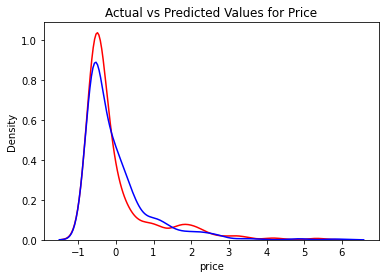

KNN: 



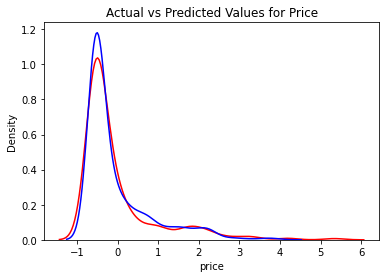

RF: 



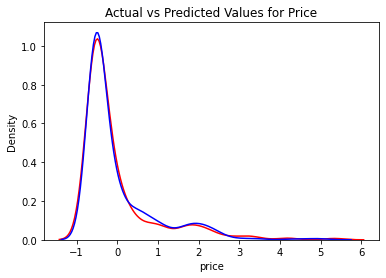

SVM:



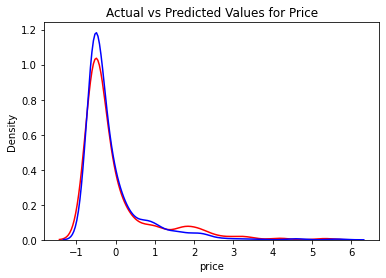

LR: 



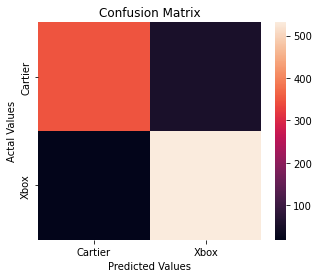

KNN: 



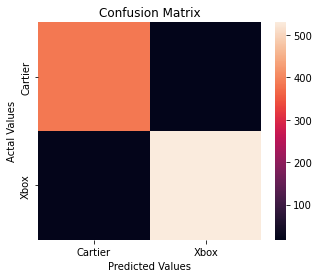

RF: 



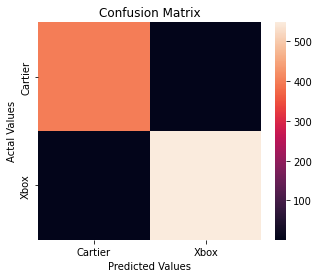

In [22]:
'''
the best model selected for regression is:

the tuned RandomForestRegressor although it has a very small improvement from the untuned version


the best model selected for the classification problemn is:

the tuned RandomForestRegressor again althought it had little to no change compared to the untuned fit originally in terms of accuracy and classification report performance

'''

reg_models = [fit_lr, fit_knn, fit_rf, fit_svm]
reg_pred = [pred_lr, pred_knn, pred_rf, pred_svm]

for i in range(4):
    if(i == 0):
        print("LR: ")
        print("")
    if(i == 1):
        print("KNN: ")
        print("")
    if(i == 2):
        print("RF: ")
        print("")
    if(i == 3):
        print("SVM:")
        print("")
    viz_reg_model = viz(reg_pred[i], reg_models[i].y_test)
    viz_reg_model.viz_reg()

class_models = [fit_logit, fit_knn_class, fit_rf_class, fit_svm_class]
class_pred = [pred_logit, pred_knn_class, pred_rf_class, pred_svm_class]
for i in range(4):
    if(i == 0):
        print("LR: ")
        print("")
    if(i == 1):
        print("KNN: ")
        print("")
    if(i == 2):
        print("RF: ")
        print("")
    if(i == 3):
        print("SVM:")
        print("")
    viz_class_model = viz(class_pred[i], class_models[i].y_test)
    viz_class_model.viz_class()

